In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('G:/New folder/RRD/ML online batch/ML Batch 3/Dataset/iris.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# EDA on Iris Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df['species'].unique() # Three sub soecies of iris is given in dataset.

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

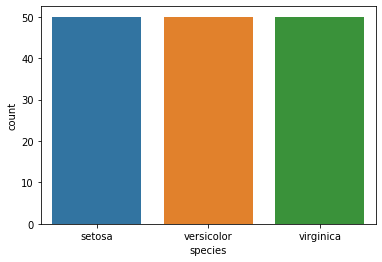

In [6]:
sns.countplot('species',data=df)

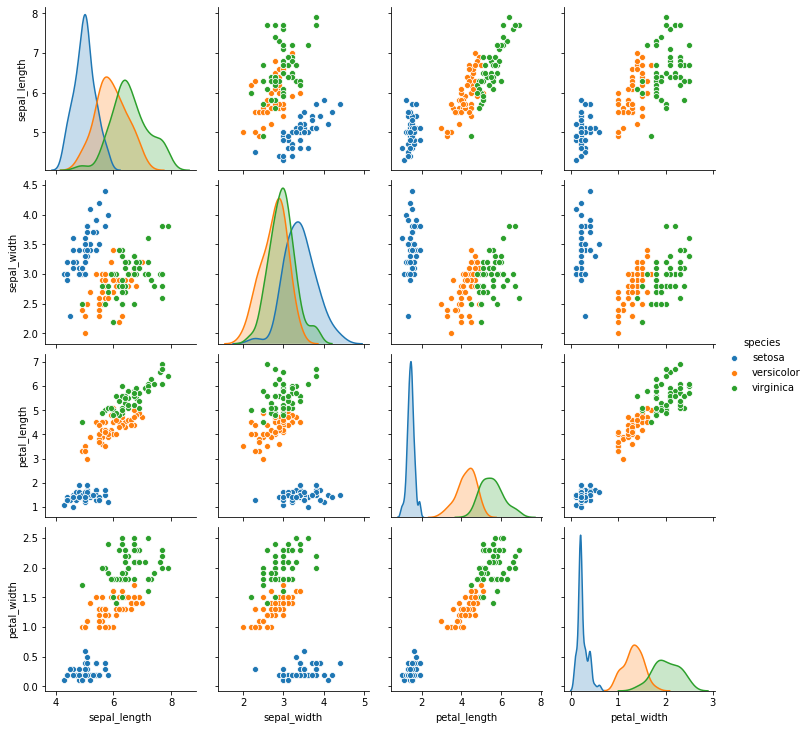

In [7]:
sns.pairplot(df, hue='species')
# ususally good for small dimention dataset

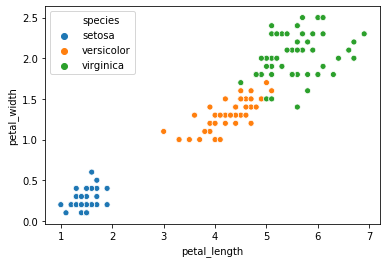

In [8]:
sns.scatterplot( x= df['petal_length'] ,y=df['petal_width'] ,hue=df['species'])

# Apply KNN Algorithm

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
X=df.iloc[ : , :4]
y=df['species']

In [11]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test =train_test_split(X,y, test_size=30, random_state=3)

In [14]:
#Total Entries = 150

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy=[]

for k in range(1,50,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit( X_train ,y_train )
    y_pred=  model.predict(X_test)
    acc= metrics.accuracy_score(y_test,y_pred)
    accuracy.append(acc)



Text(0, 0.5, 'Accuracy Score')

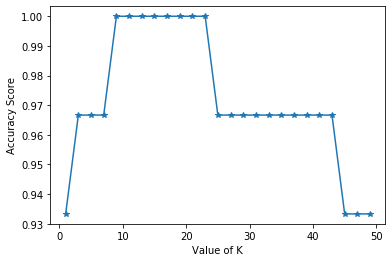

In [16]:
K=[]
for temp in range(1,50,2):
    K.append(temp)
    
plt.plot(K,accuracy,'-*')
plt.xlabel("Value of K")
plt.ylabel("Accuracy Score")


In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
K_range= list(range(1,30))
print(K_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [23]:
KNN_model= KNeighborsClassifier()
param_grid = dict(n_neighbors=K_range)

In [24]:
grid = GridSearchCV(KNN_model , param_grid ,scoring='accuracy',cv=5)

In [25]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [26]:
@grid.best_params_

{'n_neighbors': 5}

In [27]:
y_pred=grid.predict(X_test)

print(grid.best_score_)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666666
0.9666666666666667
